# Visualisation of hotel trends

In [1]:
%matplotlib inline

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# graphing style
plt.style.use("seaborn")

## Year Trends

In [4]:
# Load csv file into a dataframe
year_df = pd.read_csv("Data/hotel_yrrate.csv")
year_df.head()

,Year,Yearly Rate
0,2006,46488.121
1,2014,79795.282
2,2011,55845.469
3,2009,43366.102
4,2004,19596.943


In [5]:
# Sort the dataframe by year
year_df.sort_values("Year", inplace = True)
year_df = year_df.reset_index(drop = True)

In [6]:
# Create a subset of complete years (incomplete: 2004 and 2018)
inc = [2004, 2018]

year_subdf = year_df[~year_df["Year"].isin(inc)]

In [7]:
# Calculate the difference per year
values = pd.Series(year_subdf["Yearly Rate"].pct_change() * 100)
year_subdf.insert(loc = 2, column = "% Year Diff", value = values.values)

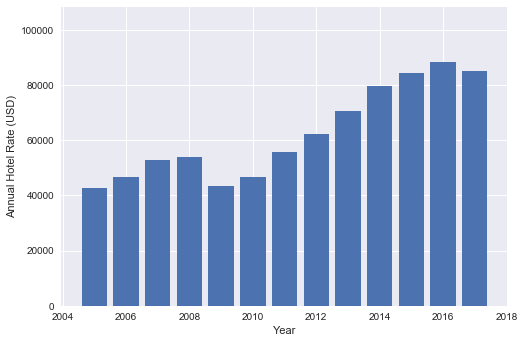

In [8]:
# Create a bar graph to show trends in hotel yearly rates
plt.bar("Year", "Yearly Rate", data = year_subdf)
plt.xlabel("Year")
plt.ylabel("Annual Hotel Rate (USD)")
plt.ylim(0, max(year_subdf["Yearly Rate"] + 20000))

# Save figure
plt.savefig("Images/hotel_yr_rates.svg")
plt.show()

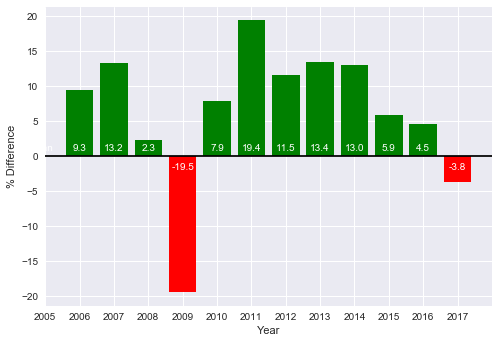

In [9]:
year = np.arange(1,len(year_subdf["Year"])+1)
diff = year_subdf["% Year Diff"]


plt.bar(year, diff, color = ["green" if diff[i] > 0 else "red" for i in year])
plt.xticks(year, year_subdf["Year"])
plt.axhline(y = 0, color = "black")
plt.xlabel("Year")
plt.ylabel("% Difference")

# add label to each bar
count = 1

for i in diff:
    if i < 0:
        y = -2
    else:
        y = 0.7
    plt.text(count, y, str(round(i, 1)) , color = "white", ha = "center")
    count += 1  

# Save figure
plt.savefig("Images/hotel_yr_diff.svg")
plt.show()    

## Monthly Trends
- Find trends in monthly rates (Which month is slowest? with highest demand? any changes after peer-to-peer accommodations came up?)

In [10]:
# Load csv file
mon_rate_df = pd.read_csv("Data/hotel_monthlyrate.csv")
mon_rate_df.head()

,Average Daily Rate,Hotel Occupancy,Date,Monthly Rate,Corrected Monthly Rate
0,157.8543,0.740657,2005-04,4735.629,3507.477
1,169.9458,0.770442,2006-04,5098.374,3928.002
2,183.4274,0.764485,2007-04,5502.822,4206.826
3,183.7442,0.768456,2008-04,5512.326,4235.983
4,157.9462,0.743636,2009-04,4738.386,3523.632


In [11]:
# Sort values by date
mon_rate_df.sort_values("Date", inplace = True)
mon_rate_df = mon_rate_df.reset_index(drop = True)
mon_rate_df.head()

,Average Daily Rate,Hotel Occupancy,Date,Monthly Rate,Corrected Monthly Rate
0,141.6038,0.738484,2004-07,4389.7178,3241.735
1,143.1187,0.719571,2004-08,4436.6797,3192.504
2,137.4212,0.750757,2004-09,4122.6360,3095.097
3,141.5987,0.778466,2004-10,4389.5597,3417.122
4,148.4632,0.682347,2004-11,4453.8960,3039.104


In [12]:
# Exclude data from 2004 and 2018
inc_str = [str(year) for year in inc] # pass the years as string (because the date is in string form)

mon_rate_df = mon_rate_df.loc[~mon_rate_df["Date"].str.contains("|".join(inc_str))] # get the data from 2005–2017
mon_rate_df.head()

,Average Daily Rate,Hotel Occupancy,Date,Monthly Rate,Corrected Monthly Rate
6,148.8121,0.729100,2005-01,4613.1751,3363.466
7,151.1379,0.740805,2005-02,4231.8612,3134.983
8,153.0208,0.744909,2005-03,4743.6448,3533.582
9,157.8543,0.740657,2005-04,4735.6290,3507.477
10,154.0527,0.756545,2005-05,4775.6337,3612.980


In [13]:
# Select Date and Corrected Monthly Rate for plotting
mon_rate_df2 = mon_rate_df[["Date", "Corrected Monthly Rate"]]
mon_rate_df2 = mon_rate_df2.set_index("Date")
mon_rate_df2.head()

,Corrected Monthly Rate
Date,
2005-01,3363.466
2005-02,3134.983
2005-03,3533.582
2005-04,3507.477
2005-05,3612.980


In [14]:
# Data is in monthly periods so set period to monthly
# Resource: http://earthpy.org/time_series_analysis_with_pandas_part_2.html

mon_rate_df2["Corrected Monthly Rate"].index = pd.to_datetime(mon_rate_df2["Corrected Monthly Rate"].index)
    # string converted to datetime format
    
mon_rate_df2.index = mon_rate_df2["Corrected Monthly Rate"].to_period(freq = "M").index 
    # convert time stamps to time periods

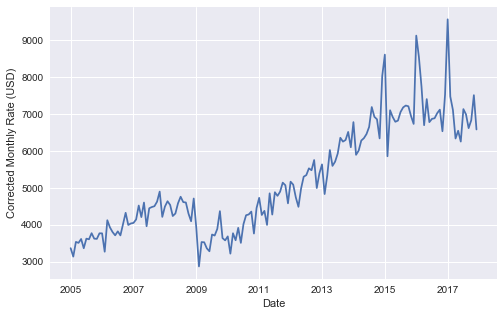

In [15]:
# Plot time series for corrected monthly rate
time_series01 = mon_rate_df2.plot.line(figsize = (8,5), legend = False)
time_series01.set_ylabel("Corrected Monthly Rate (USD)")

# Save image
plt.savefig("Images/hotel_timeseries01.svg")

In [16]:
# Get quarterly data
# start the quarter from November so that the data from Q1-Q3 of 2015 are included

q_mean = mon_rate_df2.resample("Q-NOV").mean() 
q_mean.head()

,Corrected Monthly Rate
Date,
2005Q1,3249.224500
2005Q2,3551.346333
2005Q3,3529.392333
2005Q4,3669.394333
2006Q1,3599.857000


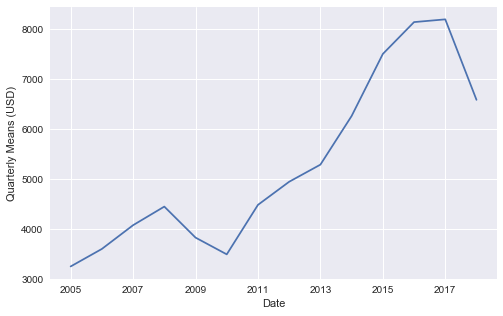

In [17]:
# Plot data by quarter
time_series02 = q_mean[q_mean.index.quarter == 1].plot(figsize = (8,5), legend = False)
time_series02.set_ylabel("Quarterly Means (USD)")

# Save image
plt.savefig("Images/hotel_timeseries02.svg")